## Importing the Packages

In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest 
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
import seaborn as sns
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

## Importing the Data

In [3]:
raw_data = yfinance.download (tickers = "VOW3.DE, PAH3.DE, BMW.DE", interval = "1d", group_by = 'ticker',
                              auto_adjust = True)

[*********************100%***********************]  3 of 3 completed


In [4]:
raw_data

PAH3.DE                                                 VOW3.DE  \
                 Open       High        Low      Close     Volume        Open   
Date                                                                            
1996-11-08        NaN        NaN        NaN        NaN        NaN         NaN   
1996-11-11        NaN        NaN        NaN        NaN        NaN         NaN   
1996-11-12        NaN        NaN        NaN        NaN        NaN         NaN   
1996-11-13        NaN        NaN        NaN        NaN        NaN         NaN   
1996-11-14        NaN        NaN        NaN        NaN        NaN         NaN   
...               ...        ...        ...        ...        ...         ...   
2023-02-20  56.119999  56.160000  55.400002  55.560001   542164.0  132.460007   
2023-02-21  55.520000  55.560001  54.540001  54.860001   623850.0  132.500000   
2023-02-22  54.700001  54.900002  54.080002  54.660000   537658.0  130.800003   
2023-02-23  54.980000  55.299999  54.580002  54.580002   538909.0  131.759995   
2023-02-24  54.720001  54.779999  53.119999  53.119999  1072307.0  132.559998   

                                                              BMW.DE  \
                  High         Low       Close     Volume       Open   
Date                                                                   
1996-11-08         NaN         NaN         NaN        NaN   9.353779   
1996-11-11         NaN         NaN         NaN        NaN   9.343505   
1996-11-12         NaN         NaN         NaN        NaN   9.328609   
1996-11-13         NaN         NaN         NaN        NaN   9.422609   
1996-11-14         NaN         NaN         NaN        NaN   9.351211   
...                ...         ...         ...        ...        ...   
2023-02-20  133.020004  131.960007  132.699997   611878.0  99.919998   
2023-02-21  132.539993  130.339996  131.080002   845515.0  99.589996   
2023-02-22  131.779999  129.039993  131.199997   816015.0  98.300003   
2023-02-23  133.139999  131.380005  131.899994   798895.0  98.709999   
2023-02-24  132.759995  127.800003  127.800003  1743109.0  99.860001   

                                                       
                  High        Low      Close   Volume  
Date                                                   
1996-11-08    9.353779   9.333746   9.333746   767000  
1996-11-11    9.348642   9.288030   9.308576   260000  
1996-11-12    9.414390   9.293166   9.378948  1066000  
1996-11-13    9.422609   9.343506   9.364052   793000  
1996-11-14    9.394359   9.313714   9.394359   351000  
...                ...        ...        ...      ...  
2023-02-20  100.519997  99.620003  99.669998   587365  
2023-02-21   99.669998  97.970001  98.699997   797867  
2023-02-22   98.750000  97.660004  98.430000   787095  
2023-02-23  100.040001  98.529999  99.650002   805804  
2023-02-24   99.919998  97.190002  97.190002  2055368  

[6743 rows x 15 columns]

In [5]:
df = raw_data.copy()

## Defining Key Dates

In [6]:
# Starting Date
start_date = "2009-04-05" 

# First Official Announcement - 49.9%
ann_1 = "2009-12-09" 

# Second Official Announcement - 51.1%
ann_2 = "2012-07-05" 

#Ending Date
end_date = "2022-01-01"

# Dieselgate
d_gate = '2015-09-20' 

## Pre-processing the Data

In [7]:
# Extracting Closing Prices
df['vol'] = df['VOW3.DE'].Close
df['por'] = df['PAH3.DE'].Close
df['bmw'] = df['BMW.DE'].Close

# Creating Returns
df['ret_vol'] = df['vol'].pct_change(1).mul(100)
df['ret_por'] = df['por'].pct_change(1).mul(100)
df['ret_bmw'] = df['bmw'].pct_change(1).mul(100)

# Creating Squared Returns
df['sq_vol'] = df.ret_vol.mul(df.ret_vol)
df['sq_por'] = df.ret_por.mul(df.ret_por)
df['sq_bmw'] = df.ret_bmw.mul(df.ret_bmw)

# Extracting Volume
df['q_vol'] = df['VOW3.DE'].Volume
df['q_por'] = df['PAH3.DE'].Volume
df['q_bmw'] = df['BMW.DE'].Volume

In [8]:
# Assigning the Frequency and Filling NA Values
df = df.asfreq('b')
df = df.fillna(method='bfill')

In [9]:
# Removing Surplus Data
del df['VOW3.DE']
del df['PAH3.DE']
del df['BMW.DE']

## Plotting the Prices

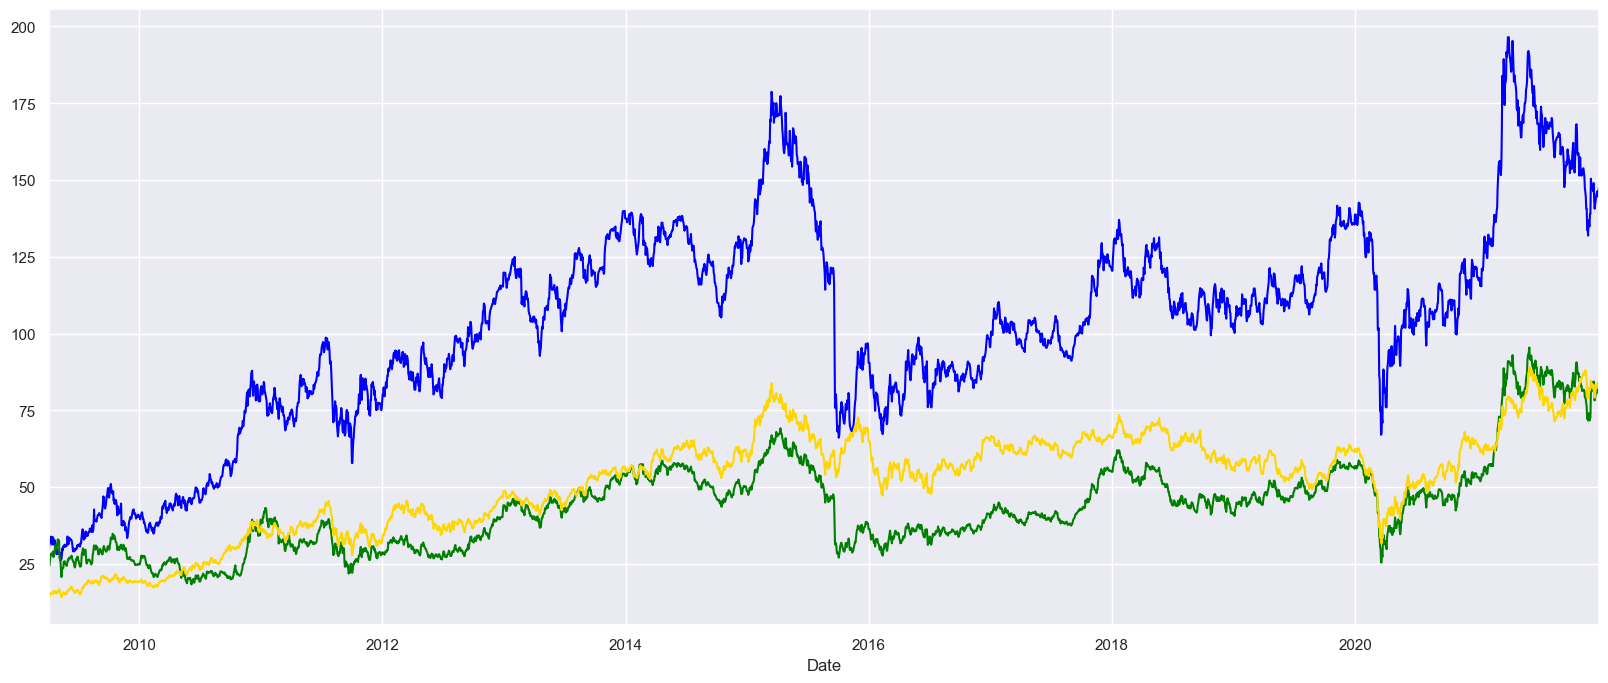

In [10]:
df['vol'][start_date:end_date].plot(figsize= (20,8), color = "blue")
df['por'][start_date:end_date].plot(color = "green")
df['bmw'][start_date:end_date].plot(color = "gold")
plt.show()

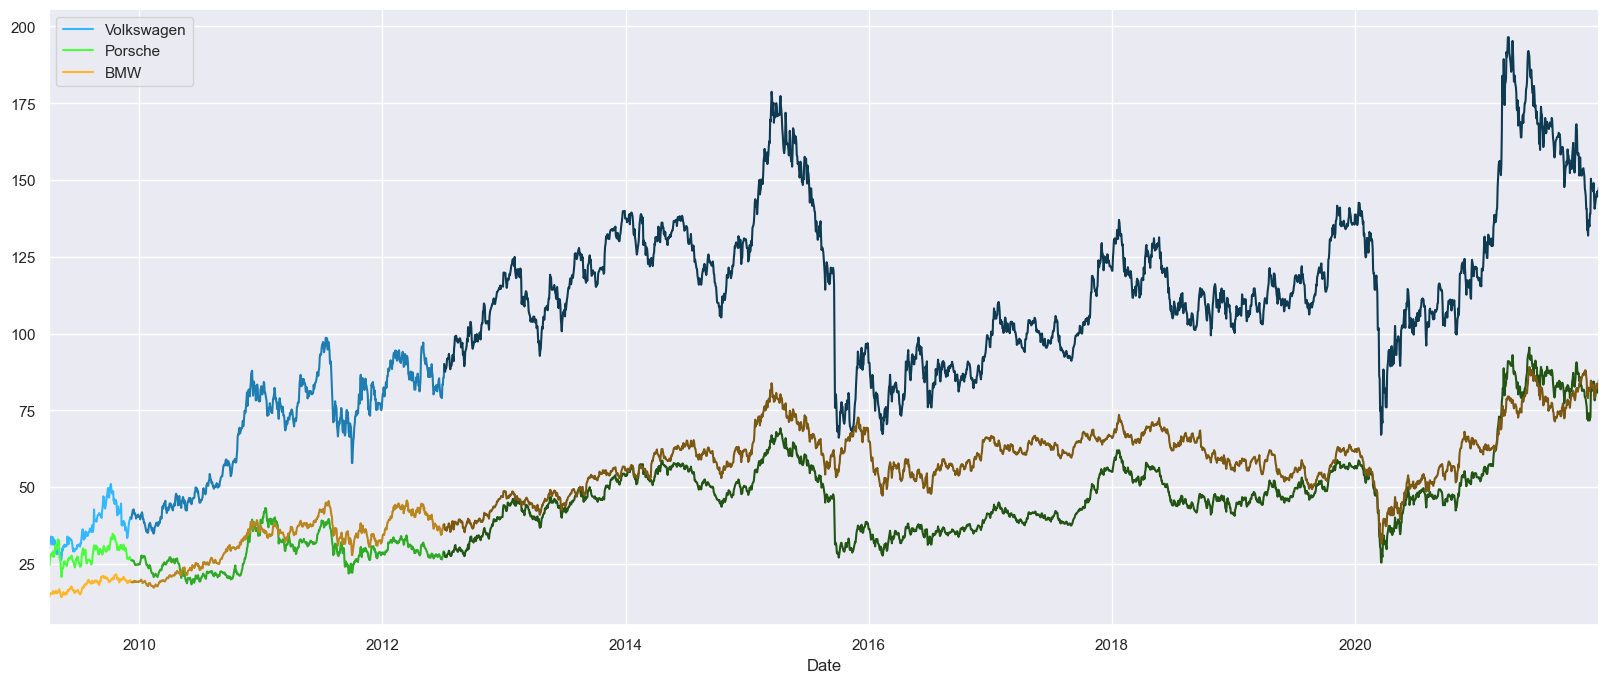

In [11]:
df['vol'][start_date:ann_1].plot(figsize= (20,8), color = "#33B8FF")
df['por'][start_date:ann_1].plot(color = "#49FF3A")
df['bmw'][start_date:ann_1].plot(color = "#FEB628")

df['vol'][ann_1:ann_2].plot(color = "#1E7EB2")
df['por'][ann_1:ann_2].plot(color = "#2FAB25")
df['bmw'][ann_1:ann_2].plot(color = "#BA861F")

df['vol'][ann_2:end_date].plot(color = "#0E3A52")
df['por'][ann_2:end_date].plot(color = "#225414")
df['bmw'][ann_2:end_date].plot(color = "#7C5913")

plt.legend(['Volkswagen','Porsche','BMW'])

plt.show()

## Correlation

In [12]:
print('Correlation among manufacturers from ' + str(start_date) + ' to ' + str(end_date)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][start_date:end_date].corr(df['por'][start_date:end_date])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][start_date:end_date].corr(df['bmw'][start_date:end_date])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][start_date:end_date].corr(df['bmw'][start_date:end_date])))

Correlation among manufacturers from 2009-04-05 to 2022-01-01

Volkswagen and Porsche correlation: 	0.9154931408738787
Volkswagen and BMW correlation: 	0.865568539372838
Porsche and BMW correlation: 		0.8183590640046671


In [13]:
print('Correlation among manufacturers from ' + str(start_date) + ' to ' + str(ann_1)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][start_date:ann_1].corr(df['por'][start_date:ann_1])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))

Correlation among manufacturers from 2009-04-05 to 2009-12-09

Volkswagen and Porsche correlation: 	0.6633584309981759
Volkswagen and BMW correlation: 	0.842760701731434
Porsche and BMW correlation: 		0.609503815914376


In [14]:
print('Correlation among manufacturers from ' + str(ann_1) + ' to ' + str(ann_2)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][ann_1:ann_2].corr(df['por'][ann_1:ann_2])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))

Correlation among manufacturers from 2009-12-09 to 2012-07-05

Volkswagen and Porsche correlation: 	0.7428267809056781
Volkswagen and BMW correlation: 	0.9795943080551163
Porsche and BMW correlation: 		0.7042723036496573


In [15]:
print('Correlation among manufacturers from ' + str(ann_2) + ' to ' + str(end_date)+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][ann_2:end_date].corr(df['por'][ann_2:end_date])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][ann_2:end_date].corr(df['bmw'][ann_2:end_date])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][ann_2:end_date].corr(df['bmw'][ann_2:end_date])))

Correlation among manufacturers from 2012-07-05 to 2022-01-01

Volkswagen and Porsche correlation: 	0.9302000080789776
Volkswagen and BMW correlation: 	0.6292093057449497
Porsche and BMW correlation: 		0.741285358806851


In [16]:
print('Correlation among manufacturers from ' + str(end_date) + ' to ' + str(df.index[-1])+ '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][end_date:].corr(df['por'][end_date:])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][end_date:].corr(df['bmw'][end_date:])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][end_date:].corr(df['bmw'][end_date:])))

Correlation among manufacturers from 2022-01-01 to 2023-02-24 00:00:00

Volkswagen and Porsche correlation: 	0.6403178118163282
Volkswagen and BMW correlation: 	0.502594728868388
Porsche and BMW correlation: 		-0.26591928035450174


## Best Fitting Models

### For Volkswagen

In [17]:
mod_pr_pre_vol = auto_arima(df.vol[start_date:ann_1], exogenous = df[['por','bmw']][start_date:ann_1],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_btn_vol = auto_arima(df.vol[ann_1:ann_2], exogenous = df[['por','bmw']][ann_1:ann_2],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_post_vol = auto_arima(df.vol[ann_2:end_date], exogenous = df[['por','bmw']][ann_2:end_date],
                            m = 5, max_p = 5, max_q = 5)

In [18]:
mod_pr_pre_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -298.650
Date:                Sun, 26 Feb 2023   AIC                            599.299
Time:                        16:21:08   BIC                            602.475
Sample:                    04-06-2009   HQIC                           600.587
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.7103      0.095     17.983      0.000       1.524       1.897
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):               232.52
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               2.10   Skew:                            -0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
mod_pr_btn_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1317.283
Date:                Sun, 26 Feb 2023   AIC                           2638.565
Time:                        16:21:14   BIC                           2647.583
Sample:                    12-09-2009   HQIC                          2642.058
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0899      0.034      2.645      0.008       0.023       0.156
sigma2         2.9696      0.119     24.998      0.000       2.737       3.202
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                85.28
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               5.54   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
mod_pr_post_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2477
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -5599.834
Date:                Sun, 26 Feb 2023   AIC                          11205.669
Time:                        16:21:18   BIC                          11223.112
Sample:                    07-05-2012   HQIC                         11212.004
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5415      0.091     -5.921      0.000      -0.721      -0.362
ma.L1          0.6210      0.089      7.014      0.000       0.447       0.794
sigma2         5.3947      0.071     75.500      0.000       5.255       5.535
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):              7404.37
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               2.11   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### For Porsche

In [21]:
mod_pr_pre_por = auto_arima(df.por[start_date:ann_1], exogenous = df[['vol','bmw']][start_date:ann_1],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_btn_por = auto_arima(df.por[ann_1:ann_2], exogenous = df[['vol','bmw']][ann_1:ann_2],
                            m = 5, max_p = 5, max_q = 5)
mod_pr_post_por = auto_arima(df.por[ann_2:end_date], exogenous = df[['vol','bmw']][ann_2:end_date],
                             m = 5, max_p = 5, max_q = 5)

In [26]:
mod_pr_pre_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  178
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -238.785
Date:                Sun, 22 Dec 2019   AIC                            489.569
Time:                        18:35:14   BIC                            508.660
Sample:                             0   HQIC                           497.311
                                - 178                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6209      0.404      1.539      0.124      -0.170       1.412
x1             0.1191      0.055      2.159      0.031       0.011       0.227
x2             0.8572      0.154      5.573      0.000       0.556       1.159
ar.L1          1.0754      0.059     18.234      0.000       0.960       1.191
ar.L2         -0.1597      0.058     -2.737      0.006      -0.274      -0.045
sigma2         0.8468      0.060     14.092      0.000       0.729       0.965
===================================================================================
Ljung-Box (Q):                       25.96   Jarque-Bera (JB):               556.69
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                            -0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
mod_pr_btn_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -629.279
Date:                Sun, 22 Dec 2019   AIC                           1268.559
Time:                        18:35:14   BIC                           1291.102
Sample:                             0   HQIC                          1277.290
                                - 672                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0226      0.024     -0.938      0.348      -0.070       0.025
x1             0.1868      0.017     11.243      0.000       0.154       0.219
x2             0.3145      0.045      7.020      0.000       0.227       0.402
ar.L1          0.0706      0.030      2.318      0.020       0.011       0.130
sigma2         0.3820      0.012     32.516      0.000       0.359       0.405
===================================================================================
Ljung-Box (Q):                       35.79   Jarque-Bera (JB):              1070.37
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               1.40   Skew:                             0.07
Prob(H) (two-sided):                  0.01   Kurtosis:                         9.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
mod_pr_post_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  390
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 5)   Log Likelihood                -235.831
Date:                           Sun, 22 Dec 2019   AIC                            483.663
Time:                                   18:35:14   BIC                            507.444
Sample:                                        0   HQIC                           493.091
                                           - 390                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0227      0.020      1.161      0.246      -0.016       0.061
x1             0.2301      0.014     16.431      0.000       0.203       0.258
x2             0.2414      0.041      5.887      0.000       0.161       0.322
ma.L1         -0.0763      0.055     -1.376      0.169      -0.185       0.032
ma.S.L5       -0.1353      0.058     -2.335      0.020      -0.249      -0.022
sigma2         0.1968      0.008     25.875      0.000       0.182       0.212
===================================================================================
Ljung-Box (Q):                       33.99   Jarque-Bera (JB):               606.95
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                             0.90
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predictions for the Future

### For Porsche

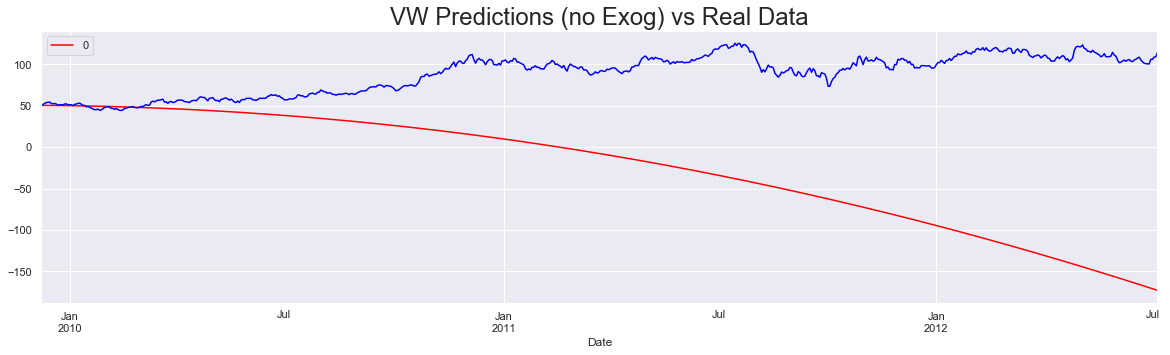

In [29]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2])), index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (no Exog) vs Real Data", size = 24)
plt.show()

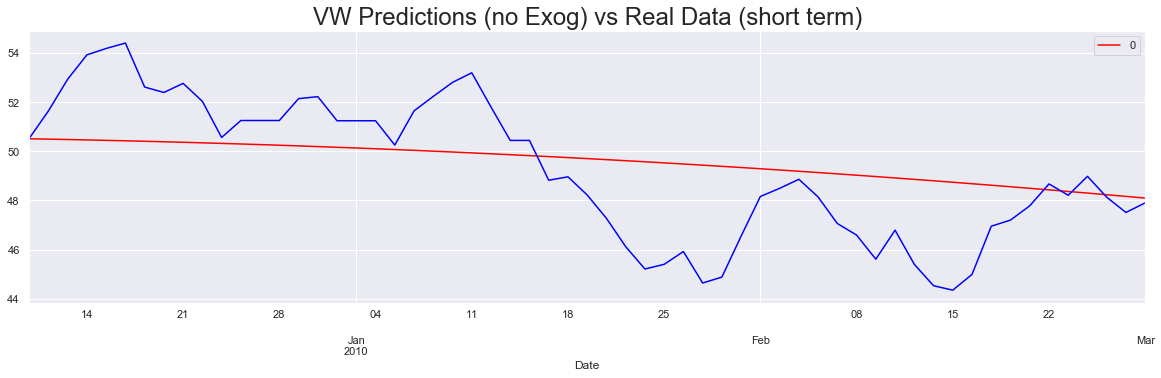

In [30]:
df_auto_pred_pr[ann_1:'2010-03-01'].plot(figsize = (20,5), color = "red")
df.vol[ann_1:'2010-03-01'].plot(color = "blue")
plt.title("VW Predictions (no Exog) vs Real Data (short term)", size = 24)
plt.show()

### For Volkswagen

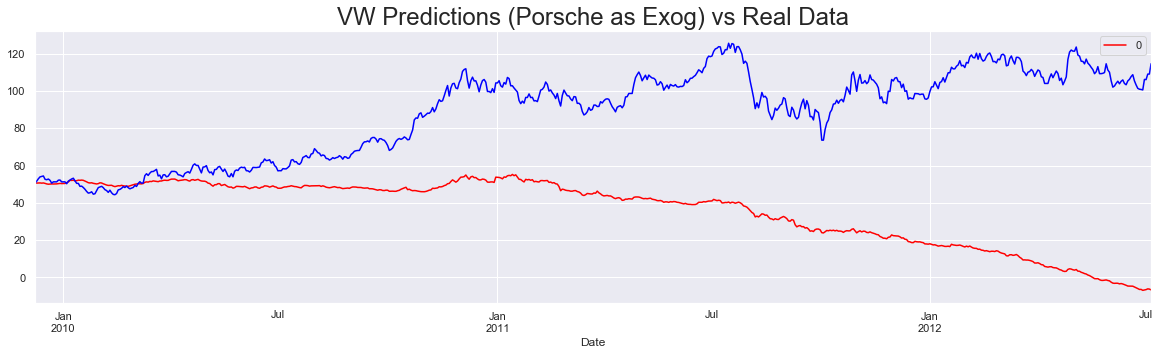

In [31]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['por']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]),exogenous = df[['por']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (Porsche as Exog) vs Real Data", size = 24)
plt.show()

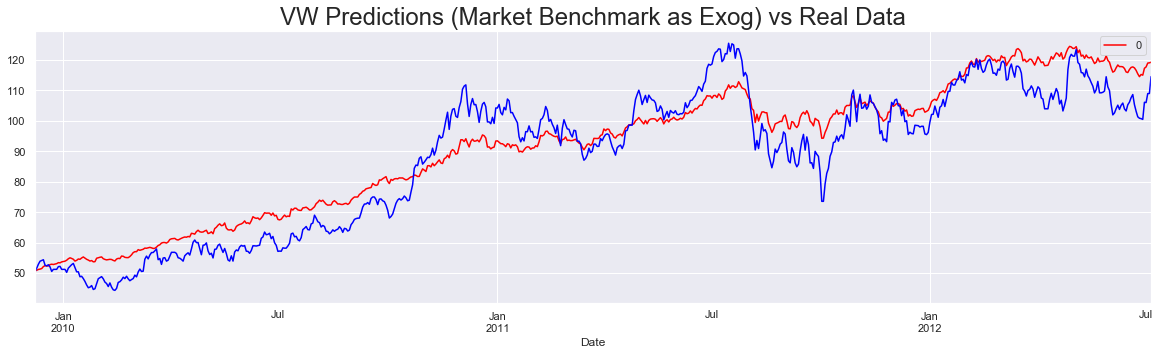

In [32]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['bmw']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]), exogenous = df[['bmw']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (Market Benchmark as Exog) vs Real Data", size = 24)
plt.show()

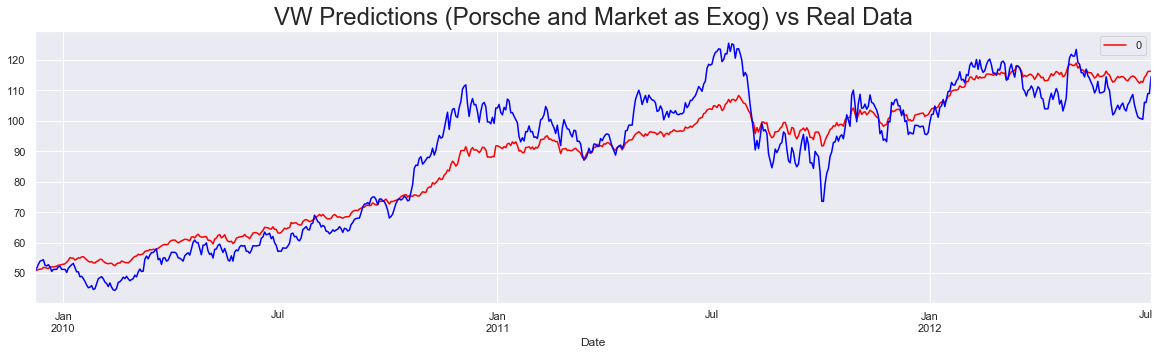

In [33]:
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous = df[['por', 'bmw']][start_date:ann_1],
                          m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5, trend = "ct")

df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods = len(df[ann_1:ann_2]), exogenous = df[['por','bmw']][ann_1:ann_2]),
                               index = df[ann_1:ann_2].index)
df_auto_pred_pr[ann_1:ann_2].plot(figsize = (20,5), color = "red")

df.vol[ann_1:ann_2].plot(color = "blue")
plt.title("VW Predictions (Porsche and Market as Exog) vs Real Data", size = 24)
plt.show()

## Volatility

### Volatility of VW for Each Period

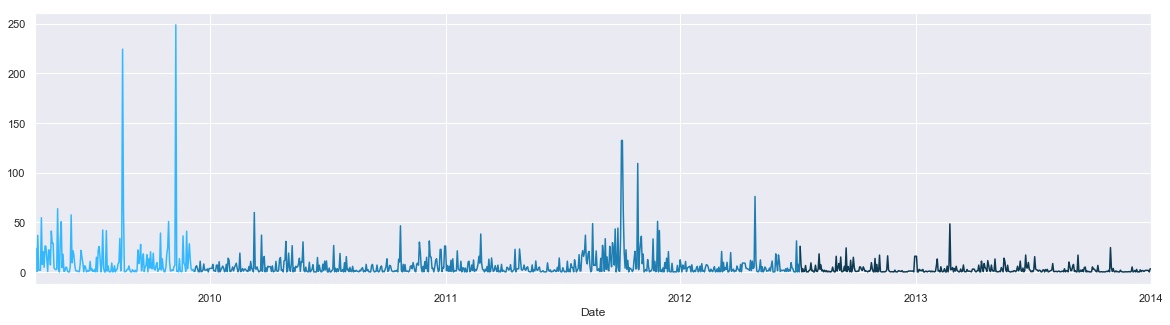

In [34]:
df['sq_vol'][start_date:ann_1].plot(figsize = (20,5), color = "#33B8FF")
df['sq_vol'][ann_1:ann_2].plot(color = "#1E7EB2")
df['sq_vol'][ann_2:end_date].plot(color = "#0E3A52")
plt.show()

### Volatility Trends for Each Period

In [35]:
model_garch_pre = arch_model(df.ret_vol[start_date:ann_1], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_pre = model_garch_pre.fit(update_freq = 5)

model_garch_btn = arch_model(df.ret_vol[ann_1:ann_2], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_btn = model_garch_btn.fit(update_freq = 5)

model_garch_post = arch_model(df.ret_vol[ann_2:end_date], mean = "Constant",  vol = "GARCH", p = 1, q = 1)
results_garch_post = model_garch_post.fit(update_freq = 5)

Iteration:      5,   Func. Count:     35,   Neg. LLF: 475.80554246919735
Iteration:     10,   Func. Count:     65,   Neg. LLF: 475.0231190712387
Iteration:     15,   Func. Count:     95,   Neg. LLF: 474.98333127347837
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 474.9833312208065
            Iterations: 15
            Function evaluations: 95
            Gradient evaluations: 15
Iteration:      5,   Func. Count:     42,   Neg. LLF: 1527.0172774401954
Iteration:     10,   Func. Count:     72,   Neg. LLF: 1526.8261362154667
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1526.8261362142086
            Iterations: 10
            Function evaluations: 72
            Gradient evaluations: 10
Iteration:      5,   Func. Count:     38,   Neg. LLF: 724.5630952053876
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 724.5589147774609
            Iterations: 7
        

In [36]:
results_garch_pre.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -474.983
Distribution:                  Normal   AIC:                           957.967
Method:            Maximum Likelihood   BIC:                           970.694
                                        No. Observations:                  178
Date:                Sun, Dec 22 2019   Df Residuals:                      174
Time:                        18:35:33   Df Model:                            4
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1565      0.267      0.587      0.557 [ -0.366,  0.679]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         10.6098      4.232      2.507  1.217e-02    [  2.316, 18.904]
alpha[1]       0.1550  9.249e-02      1.675  9.384e-02 [-2.631e-02,  0.336]
beta[1]        0.0000      0.350      0.000      1.000    [ -0.685,  0.685]
===========================================================================

Covariance estimator: robust
"""

In [37]:
results_garch_btn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -1526.83
Distribution:                  Normal   AIC:                           3061.65
Method:            Maximum Likelihood   BIC:                           3079.69
                                        No. Observations:                  672
Date:                Sun, Dec 22 2019   Df Residuals:                      668
Time:                        18:35:33   Df Model:                            4
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1893  8.635e-02      2.193  2.832e-02 [2.010e-02,  0.359]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1680  7.913e-02      2.124  3.371e-02 [1.294e-02,  0.323]
alpha[1]       0.0688  1.683e-02      4.089  4.326e-05 [3.584e-02,  0.102]
beta[1]        0.9040  2.107e-02     42.901      0.000   [  0.863,  0.945]
==========================================================================

Covariance estimator: robust
"""

In [38]:
results_garch_post.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -724.559
Distribution:                  Normal   AIC:                           1457.12
Method:            Maximum Likelihood   BIC:                           1472.98
                                        No. Observations:                  390
Date:                Sun, Dec 22 2019   Df Residuals:                      386
Time:                        18:35:33   Df Model:                            4
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2298  9.829e-02      2.338  1.941e-02 [3.711e-02,  0.422]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.7703      0.672      1.146      0.252    [ -0.547,  2.088]
alpha[1]       0.1851      0.145      1.275      0.202 [-9.941e-02,  0.470]
beta[1]        0.5144      0.329      1.563      0.118    [ -0.130,  1.159]
===========================================================================

Covariance estimator: robust
"""